In [11]:
from utils.caching_helper import read_pkl_data_from_cache

SENSORS_PATH = (
    r"/Users/administrator/Code/python/phd-project/phd_package/data/pipeline/sensors/"
)

sensors_df = read_pkl_data_from_cache(SENSORS_PATH)

lat = sensors_df["Sensor Centroid Latitude"]
lon = sensors_df["Sensor Centroid Longitude"]

Loading data from: /Users/administrator/Code/python/phd-project/phd_package/data/pipeline/sensors/2022-07-24 00:00:00_to_2024-08-02 00:00:00_2B774B40.pkl
Data loaded successfully


In [12]:
sensors_df.head()

,Sensor Name,Raw ID,Location (WKT),Sensor Centroid Longitude,Sensor Centroid Latitude,Ground Height Above Sea Level,Third Party,Broker Name,Sensor Height Above Ground
0,PER_PEOPLE_ELDONSQUAREMID_SQUAREEAST_TO_SQUARE...,79852,POINT (-1.615202637 54.97434814),-1.615203,54.974348,46.090000,False,People Counting API,2.0
1,PER_PEOPLE_ELDONSQUAREMID_SQUAREEAST_TO_SQUARE...,79851,POINT (-1.615179846 54.97449489),-1.615180,54.974495,46.139999,False,People Counting API,2.0
2,PER_PEOPLE_ELDONSQUAREMID_SQUARE_TO_WEST,79871,POINT (-1.615555625 54.97444083),-1.615556,54.974441,46.259998,False,People Counting API,2.0
3,PER_PEOPLE_ELDONSQUAREMID_SQUARE_TO_SQUARE,79867,POINT (-1.615274297 54.97442963),-1.615274,54.974430,46.169998,False,People Counting API,2.0
4,PER_PEOPLE_ELDONSQUAREMID_SQUARE_TO_EAST,79866,POINT (-1.614988195 54.97440933),-1.614988,54.974409,46.020000,False,People Counting API,2.0


In [2]:
import matplotlib.pyplot as plt
import osmnx as ox
from shapely.geometry import Polygon
from shapely import wkb
from phd_package.utils.config_helper import get_polygon_wkb
from phd_package.dashboard.utils.color_helper import accent_colors

polygon_bbox_wkb = get_polygon_wkb()
polygon_bbox = wkb.loads(polygon_bbox_wkb, hex=True)

# bbox coords
[-1.65327, 54.93188, -1.54993, 55.02084]
polygon_bbox = Polygon(
    [
        [-1.65327, 54.93188],
        [-1.54993, 54.93188],
        [-1.54993, 55.02084],
        [-1.65327, 55.02084],
    ]
)

# Download the street network within the bounding box
G = ox.graph_from_polygon(polygon_bbox, network_type="all")

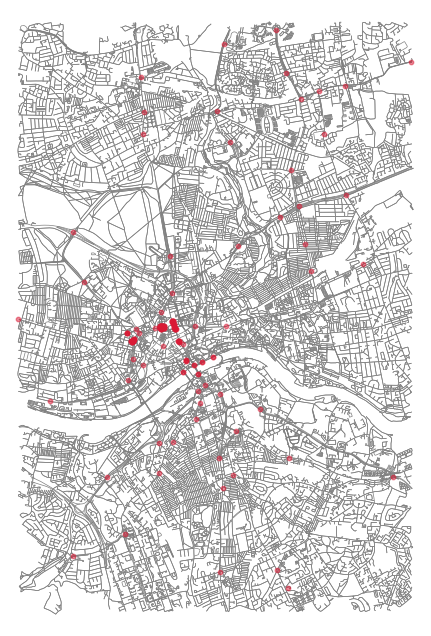

In [ ]:
# Plot the street network
fig, ax = ox.plot_graph(
    G,
    bgcolor="none",
    node_size=0,
    edge_color="grey",
    edge_linewidth=0.5,
    show=False,
    close=False,
)

# Plot the sensors
ax.scatter(
    sensors_df["Sensor Centroid Longitude"],
    sensors_df["Sensor Centroid Latitude"],
    s=10,
    c=accent_colors["Red"],
    alpha=0.5,
)

# Save the figure with a transparent background
fig.savefig(
    "../figures/methodology/map_of_sensors.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)